In [1]:
import warnings
import itertools
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
server = 'DESKTOP-G26BGNU' 
database = 'AdventureWorksDW2022' 
username = 'sa' 
password = '123456'  

driver = 'DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password+ ';Trusted_Connection=yes'
# create the connection

query = '''SELECT OrderDate AS FECHA, COUNT(SalesOrderNumber) AS CANTIDAD  FROM [AdventureWorksDW2022].[dbo].[FactInternetSales] GROUP BY OrderDate'''

conn = pyodbc.connect(driver)
data = pd.read_sql(query,conn)

data.head()


,FECHA,CANTIDAD
0,2011-06-27,10
1,2011-09-06,6
2,2012-05-24,8
3,2012-08-03,17
4,2013-04-21,144


In [16]:
data.tail()

,FECHA,CANTIDAD
1119,2011-02-03,8
1120,2012-06-09,14
1121,2012-07-28,8
1122,2013-12-02,148
1123,2014-01-20,69


In [4]:
data['FECHA'].min()

Timestamp('2010-12-29 00:00:00')

In [5]:
data['FECHA'].max()

Timestamp('2014-01-28 00:00:00')

In [6]:
data = data.set_index('FECHA')
data.index

DatetimeIndex(['2011-06-27', '2011-09-06', '2012-05-24', '2012-08-03',
               '2013-04-21', '2011-06-04', '2011-09-29', '2012-05-01',
               '2012-08-26', '2013-03-29',
               ...
               '2013-02-13', '2011-07-02', '2012-03-01', '2012-11-05',
               '2013-10-12', '2011-02-03', '2012-06-09', '2012-07-28',
               '2013-12-02', '2014-01-20'],
              dtype='datetime64[ns]', name='FECHA', length=1124, freq=None)

In [7]:
grafic = data['CANTIDAD'].resample('MS').mean()

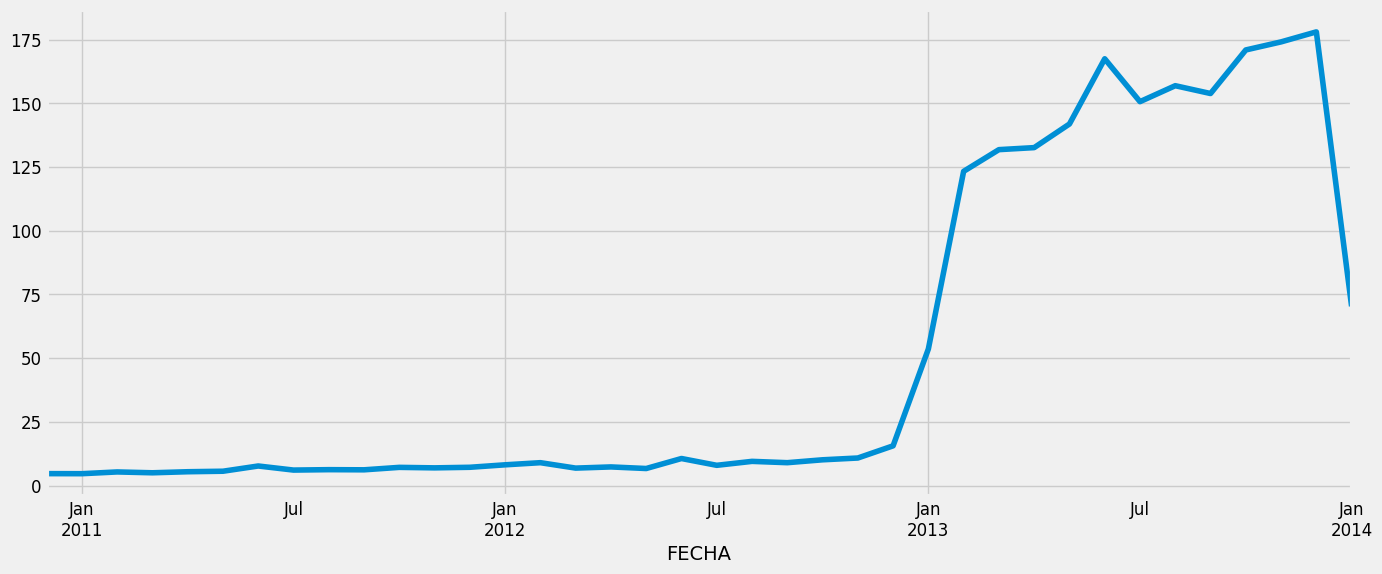

In [8]:
grafic.plot(figsize=(15, 6))
plt.show()

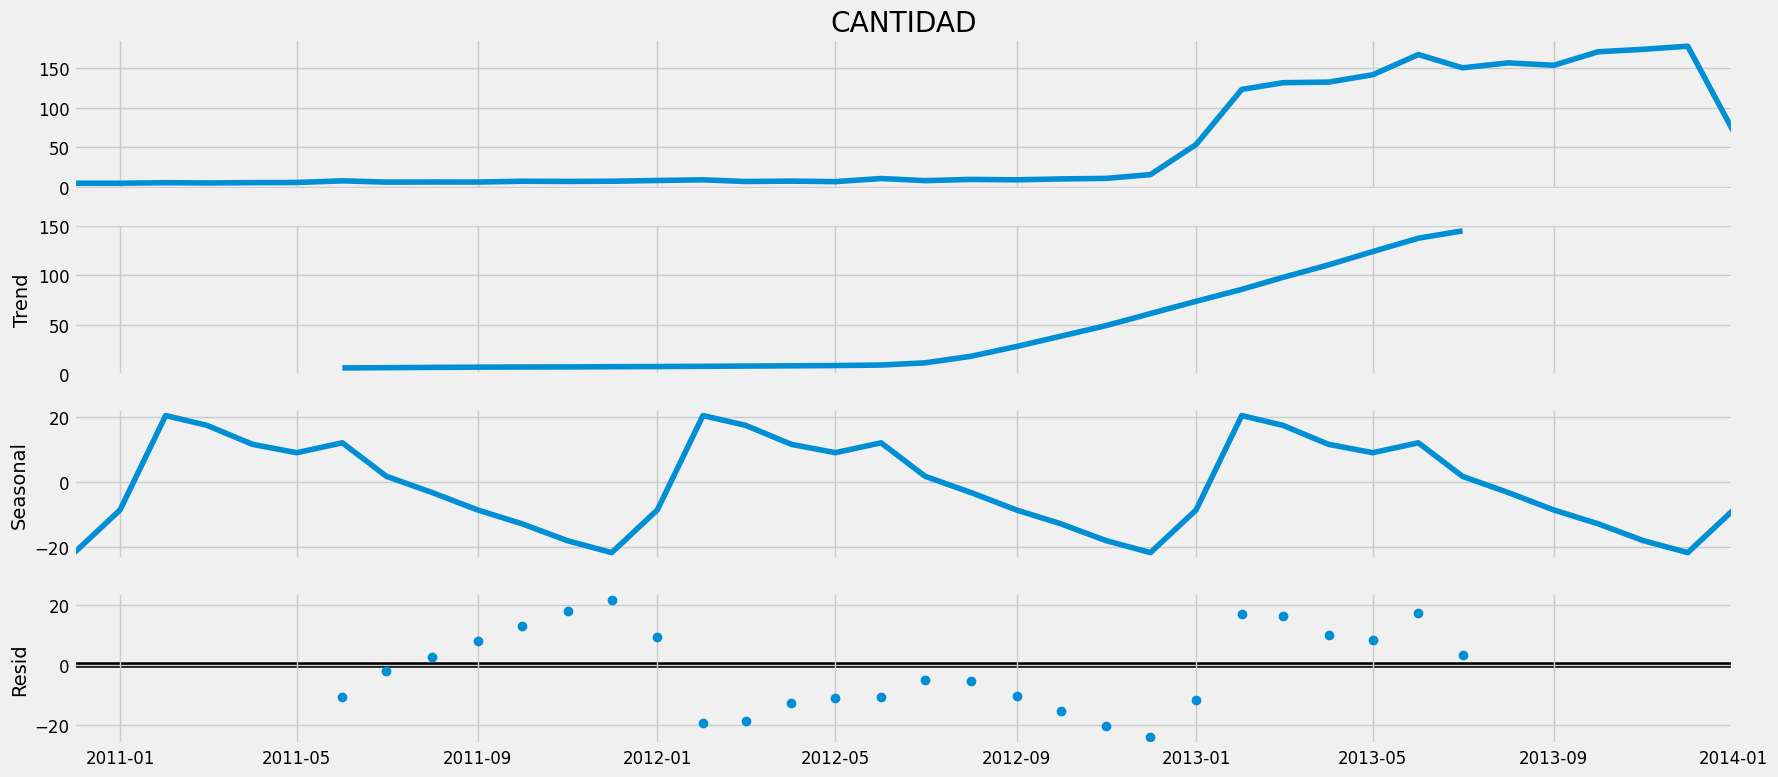

In [9]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(grafic, model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(grafic,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:436.12901922046416
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1236.746405931482
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:301.3258803632315
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:167.72376552214962
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:306.17308826141624
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:296.12985744970274
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:178.70574630939893
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:169.2324573609974
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:388.5547937419094
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1779.6605000025124
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:267.34403685693826
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:145.23060151452535
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:288.97792556620084
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:270.9119067054263
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:166.8045455430088
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:147.2171492304831
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:330.6518711956683
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1127.4520988600782


In [12]:
mod = sm.tsa.statespace.SARIMAX(grafic,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2718      4.346      0.063      0.950      -8.247       8.790
ma.L1          0.1195      4.890      0.024      0.981      -9.464       9.703
ar.S.L12      -0.1088    170.309     -0.001      0.999    -333.908     333.690
ma.S.L12      -0.3372    212.595     -0.002      0.999    -417.016     416.341
sigma2       905.5572   2.31e+04      0.039      0.969   -4.44e+04    4.62e+04


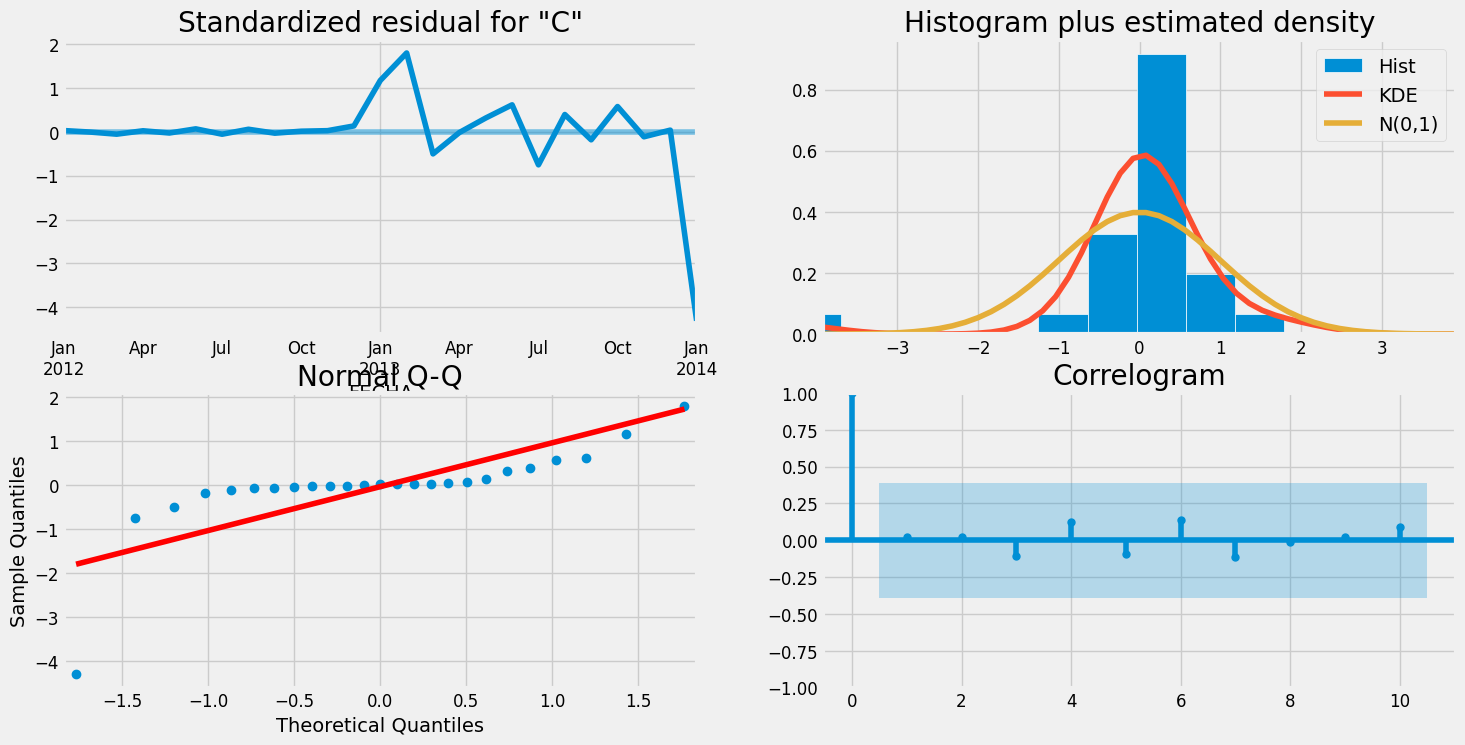

In [13]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

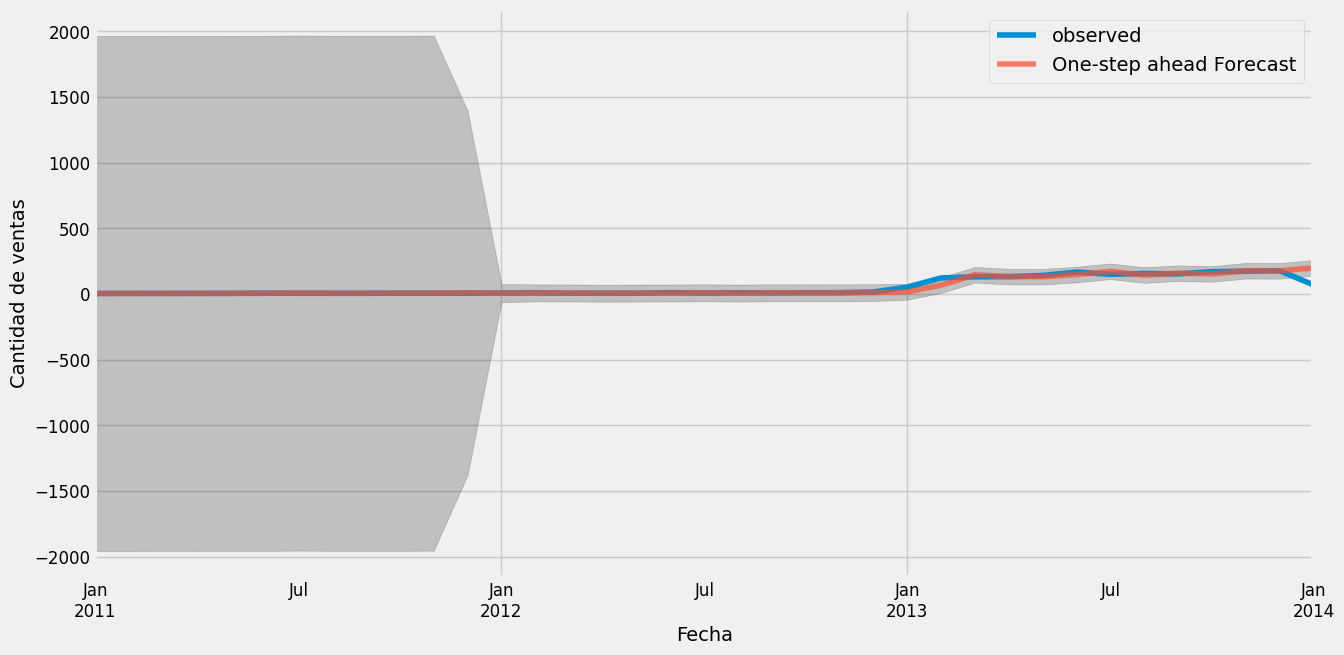

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2011-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = grafic['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de ventas')
plt.legend()

plt.show()

In [50]:
y_forecasted = pred.predicted_mean
y_truth = grafic['2013-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1755.31


In [51]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 41.9


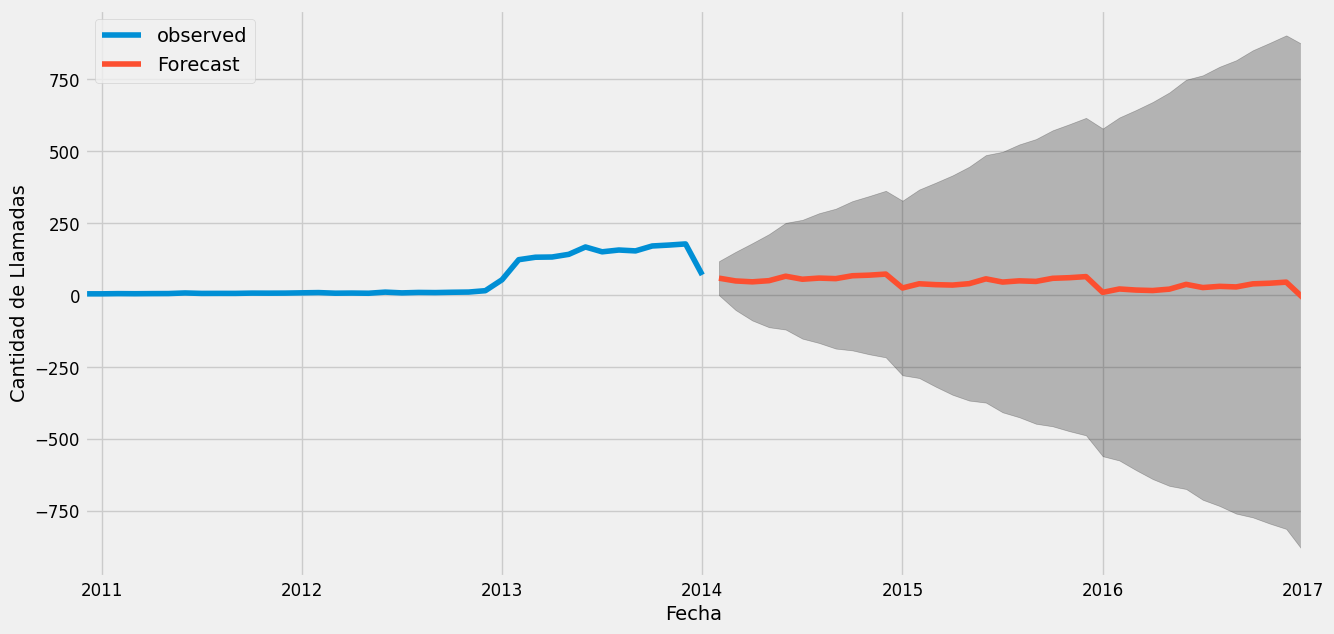

In [54]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()

ax = grafic.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Llamadas')

plt.legend()
plt.show()

pred_uc.summary_frame().to_csv("resultadosGeneral.csv")